In [1]:
%pip install imbalanced-learn

In [2]:
%pip install seaborn

In [3]:
import pandas as pd
import numpy as np 

from sklearn.preprocessing import StandardScaler, LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

Matplotlib is building the font cache; this may take a moment.


In [4]:
data = pd.read_csv('credit_card_fraud_dataset.csv')

In [5]:
label_encoder_type = LabelEncoder()
label_encoder_location = LabelEncoder()

data['TransactionType'] = label_encoder_type.fit_transform(data['TransactionType'])
data['Location'] = label_encoder_location.fit_transform(data['Location'])

transaction_type_mapping = dict(zip(label_encoder_type.classes_, range(len(label_encoder_type.classes_))))
location_mapping = dict(zip(label_encoder_location.classes_, range(len(label_encoder_location.classes_))))

transaction_type_inverse_mapping = {v: k for k, v in transaction_type_mapping.items()}
location_inverse_mapping = {v: k for k, v in location_mapping.items()}

In [6]:
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])

data['TransactionHour'] = data['TransactionDate'].dt.hour
data['TransactionDay'] = data['TransactionDate'].dt.day 
data['TransactionMonth'] = data['TransactionDate'].dt.month 

data = data.drop(columns=['TransactionDate'])

In [7]:
data.head()

,TransactionID,Amount,MerchantID,TransactionType,Location,IsFraud,TransactionHour,TransactionDay,TransactionMonth
0,1,4189.27,688,1,7,0,14,3,4
1,2,2659.71,109,1,1,0,13,19,3
2,3,784.00,394,0,4,0,10,8,1
3,4,3514.40,944,0,5,0,23,13,4
4,5,369.07,475,0,6,0,18,12,7


In [8]:
data.describe()

,TransactionID,Amount,MerchantID,TransactionType,Location,IsFraud,TransactionHour,TransactionDay,TransactionMonth
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000
mean,50000.500000,2497.092666,501.676070,0.501310,4.485300,0.010000,11.50084,15.782220,6.516240
std,28867.657797,1442.415999,288.715868,0.500001,2.876283,0.099499,6.91768,8.813795,3.448248
min,1.000000,1.050000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000
25%,25000.750000,1247.955000,252.000000,0.000000,2.000000,0.000000,6.00000,8.000000,4.000000
50%,50000.500000,2496.500000,503.000000,1.000000,4.000000,0.000000,12.00000,16.000000,7.000000
75%,75000.250000,3743.592500,753.000000,1.000000,7.000000,0.000000,17.00000,23.000000,10.000000
max,100000.000000,4999.770000,1000.000000,1.000000,9.000000,1.000000,23.00000,31.000000,12.000000


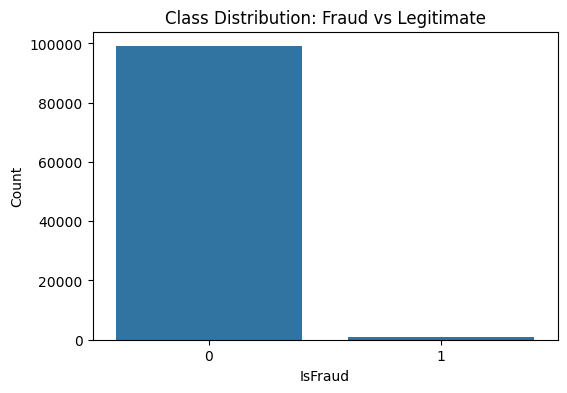

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x='IsFraud', data=data)
plt.title('Class Distribution: Fraud vs Legitimate')
plt.xlabel('IsFraud')
plt.ylabel('Count')
plt.show()

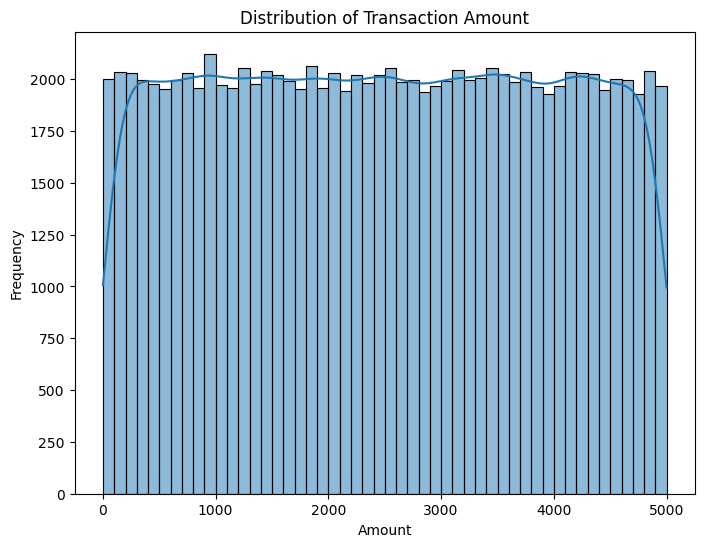

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

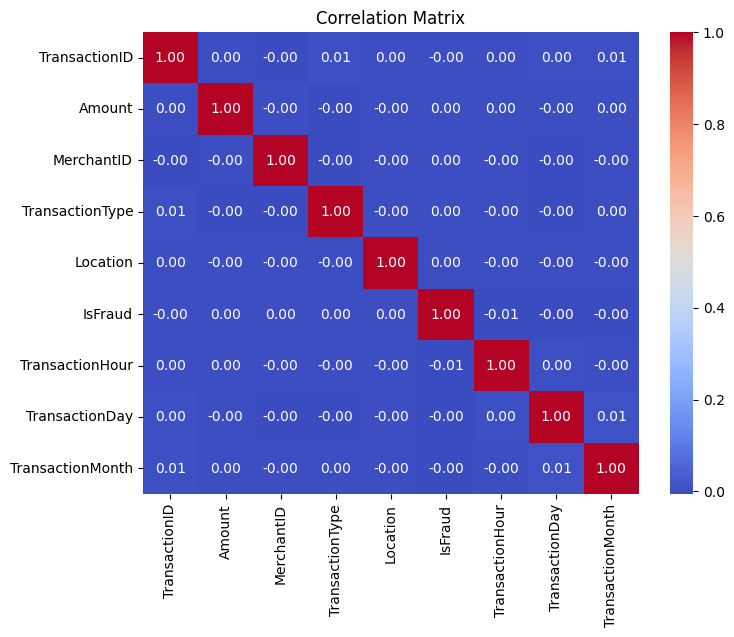

In [11]:
correlation = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

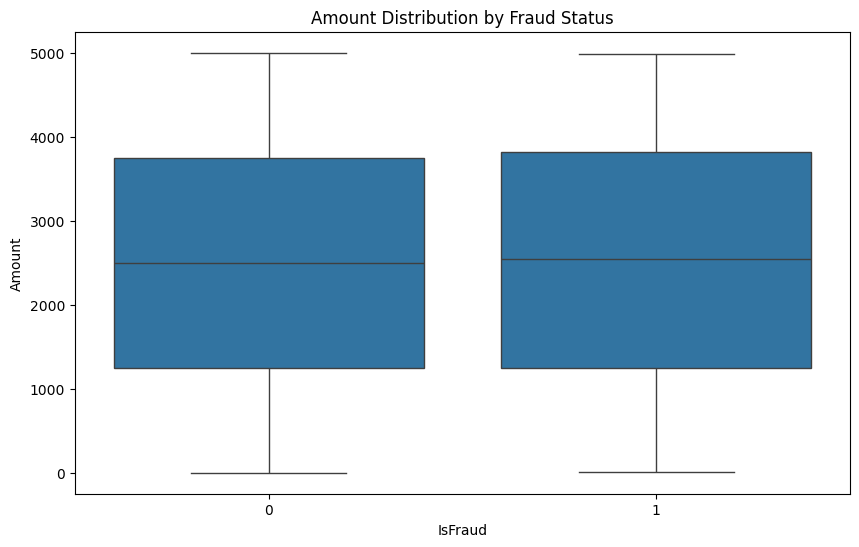

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='IsFraud', y='Amount', data=data)
plt.title('Amount Distribution by Fraud Status')
plt.xlabel('IsFraud')
plt.ylabel('Amount')
plt.show()

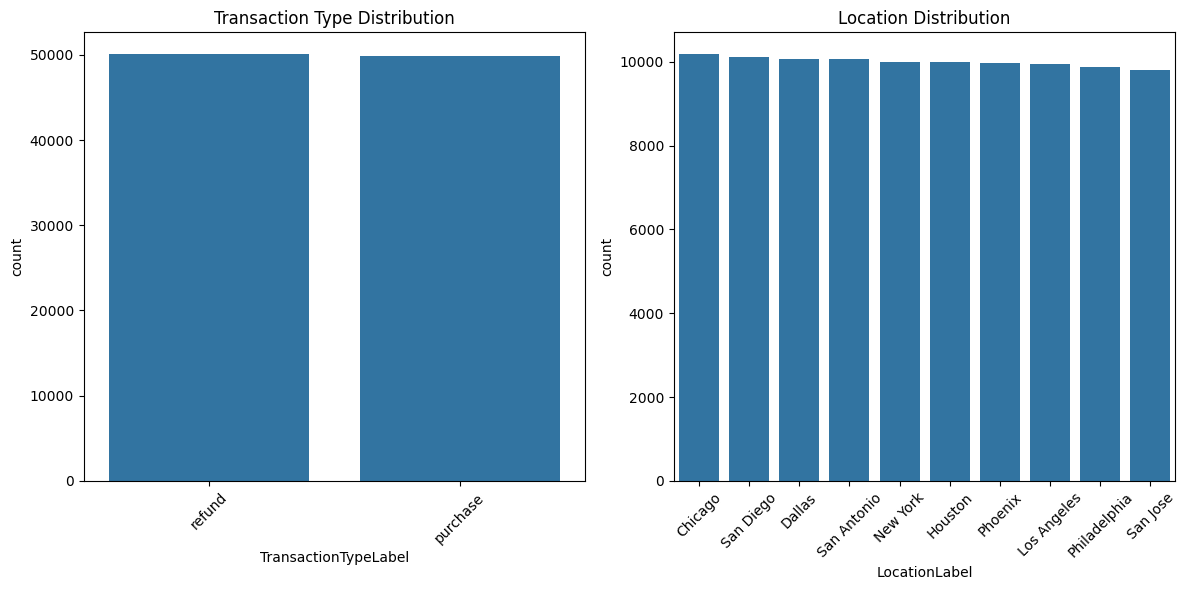

In [13]:
data['TransactionTypeLabel'] = data['TransactionType'].map(transaction_type_inverse_mapping)
data['LocationLabel'] = data['Location'].map(location_inverse_mapping)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='TransactionTypeLabel', data=data, order=data['TransactionTypeLabel'].value_counts().index)
plt.title('Transaction Type Distribution')
plt.xticks(rotation=45) 

plt.subplot(1, 2, 2)
sns.countplot(x='LocationLabel', data=data, order=data['LocationLabel'].value_counts().index)
plt.title('Location Distribution')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

<ipython-input-14-8f0b452c3b54>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='LocationLabel', y='FraudCount', data=fraud_by_location, palette='viridis')
<ipython-input-14-8f0b452c3b54>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='LocationLabel', y='TotalTransactions', data=total_transactions_by_location, palette='coolwarm')


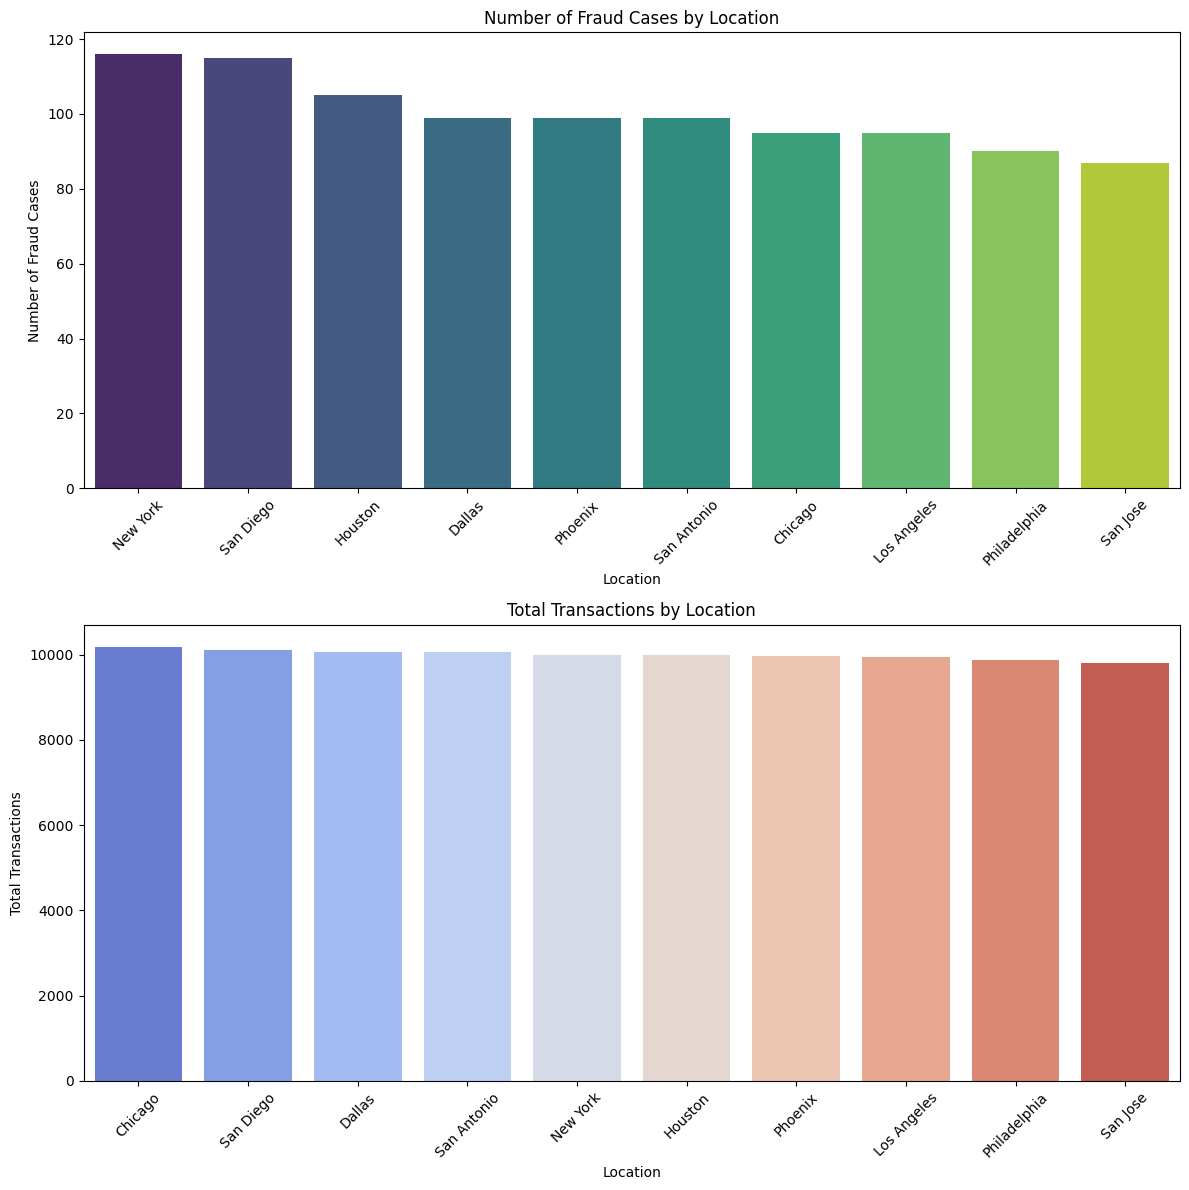

In [14]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)

fraud_by_location = data[data['IsFraud'] == 1].groupby('LocationLabel').size().reset_index(name='FraudCount')

fraud_by_location = fraud_by_location.sort_values(by='FraudCount', ascending=False)

# Create the barplot for fraud cases
sns.barplot(x='LocationLabel', y='FraudCount', data=fraud_by_location, palette='viridis')
plt.title('Number of Fraud Cases by Location')
plt.xlabel('Location')
plt.ylabel('Number of Fraud Cases')
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)

total_transactions_by_location = data.groupby('LocationLabel').size().reset_index(name='TotalTransactions')

total_transactions_by_location = total_transactions_by_location.sort_values(by='TotalTransactions', ascending=False)

sns.barplot(x='LocationLabel', y='TotalTransactions', data=total_transactions_by_location, palette='coolwarm')
plt.title('Total Transactions by Location')
plt.xlabel('Location')
plt.ylabel('Total Transactions')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<Axes: xlabel='Amount', ylabel='TransactionHour'>

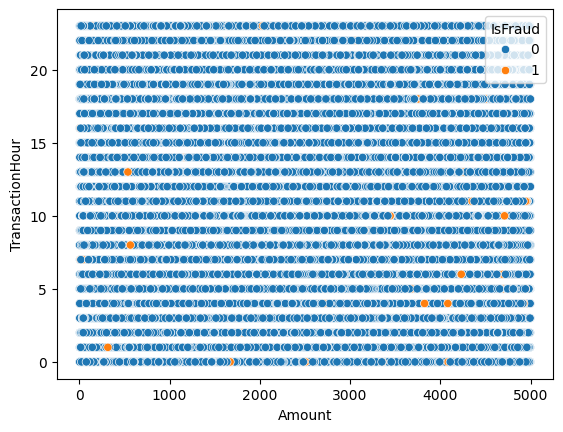

In [15]:
sns.scatterplot(x='Amount', y='TransactionHour', hue='IsFraud', data=data)

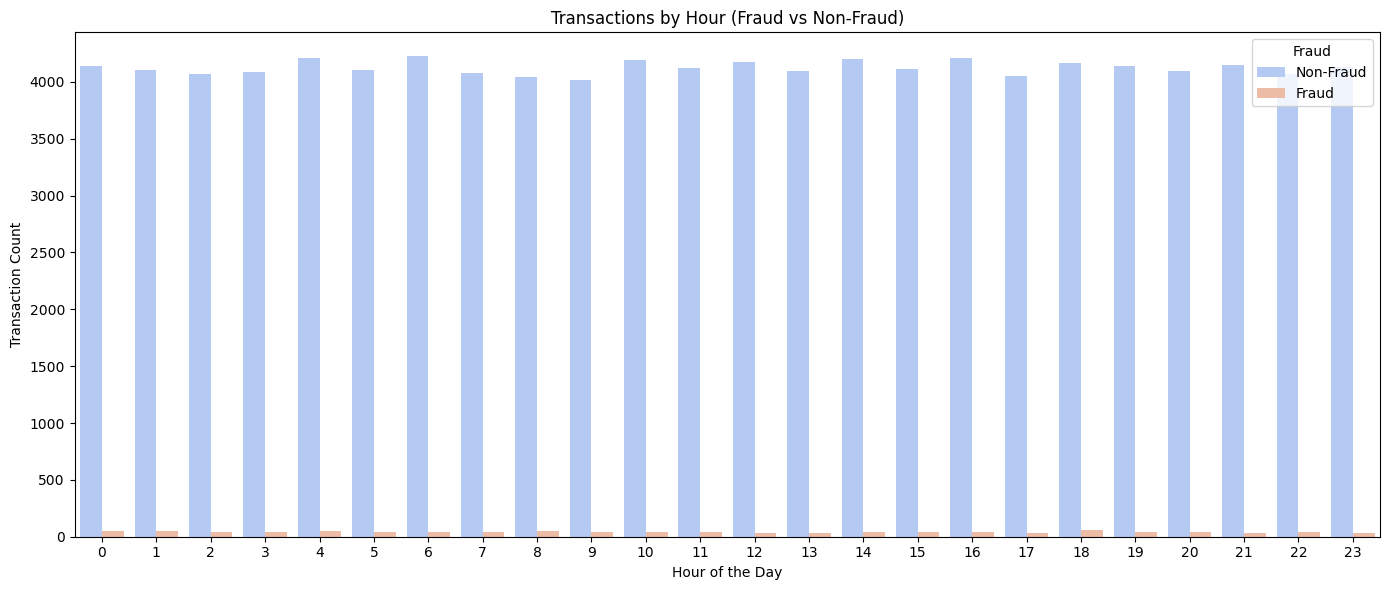

In [16]:
plt.figure(figsize=(14, 6))

sns.countplot(x='TransactionHour', hue='IsFraud', data=data, palette='coolwarm')
plt.title('Transactions by Hour (Fraud vs Non-Fraud)')
plt.xlabel('Hour of the Day')
plt.ylabel('Transaction Count')
plt.legend(title='Fraud', loc='upper right', labels=['Non-Fraud', 'Fraud'])
plt.tight_layout()
plt.show()

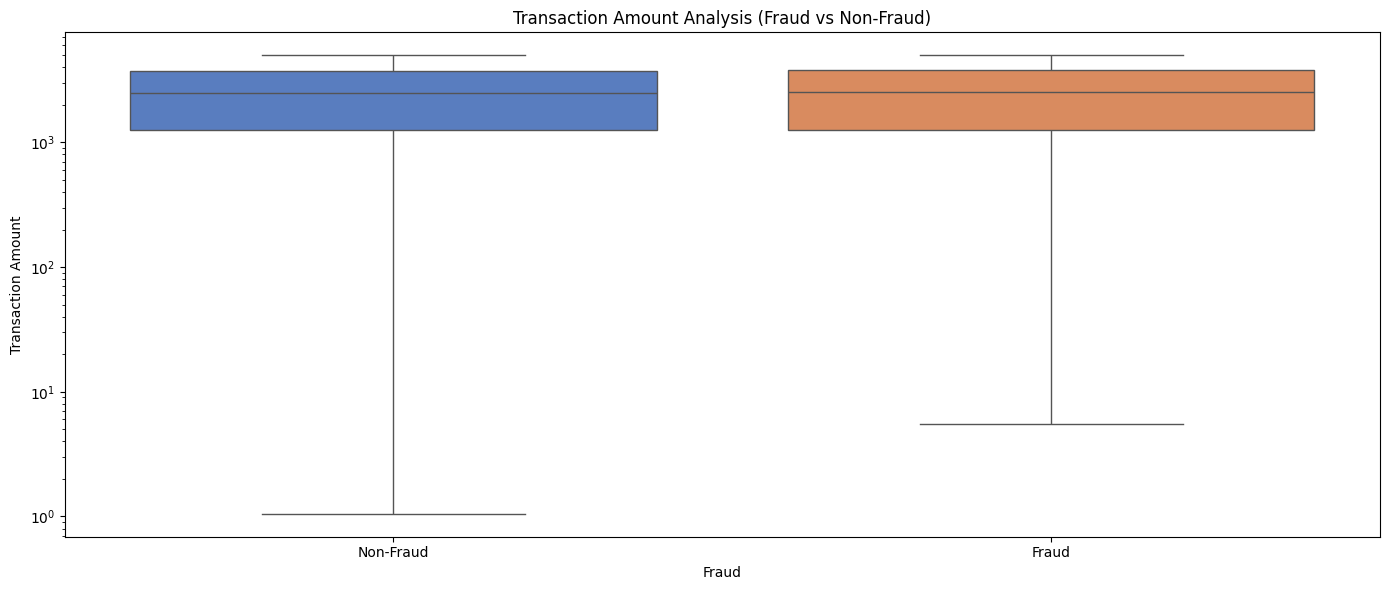

In [17]:
plt.figure(figsize=(14, 6))

sns.boxplot(x='IsFraud', y='Amount', data=data, hue='IsFraud', palette='muted', legend=False)
plt.title('Transaction Amount Analysis (Fraud vs Non-Fraud)')
plt.xlabel('Fraud')
plt.ylabel('Transaction Amount')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])
plt.yscale('log')  
plt.tight_layout()
plt.show()

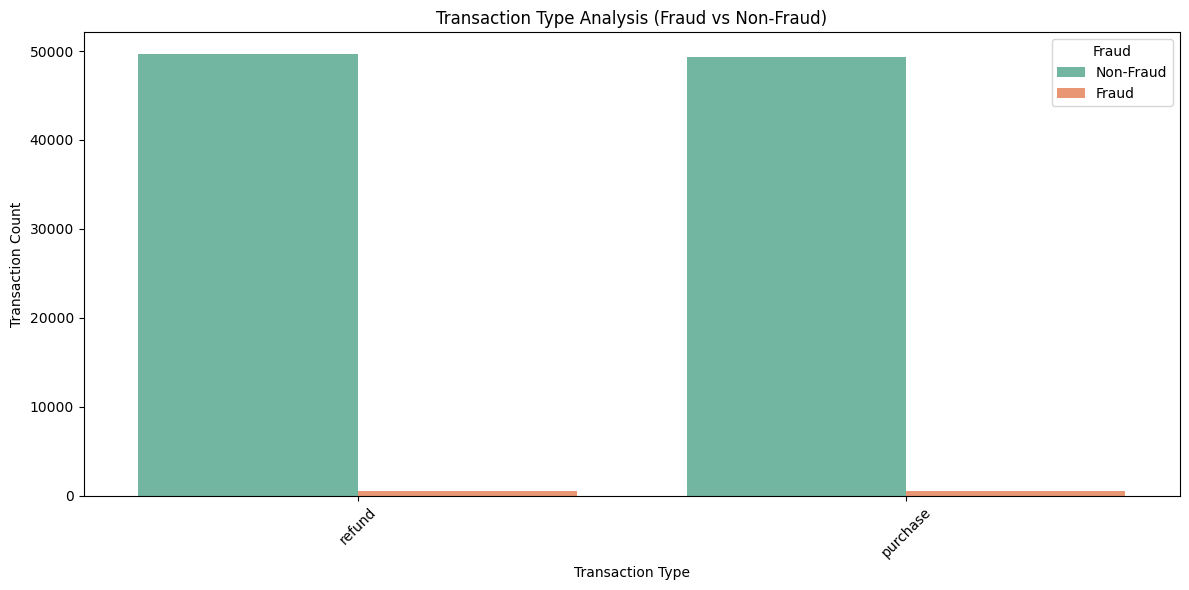

In [18]:
plt.figure(figsize=(12, 6))

sns.countplot(x='TransactionTypeLabel', hue='IsFraud', data=data, palette='Set2')
plt.title('Transaction Type Analysis (Fraud vs Non-Fraud)')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Count')
plt.legend(title='Fraud', loc='upper right', labels=['Non-Fraud', 'Fraud'])
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

<ipython-input-19-94a04abfd6b2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TransactionTypeLabel', data=fraud_data, palette='Set2')


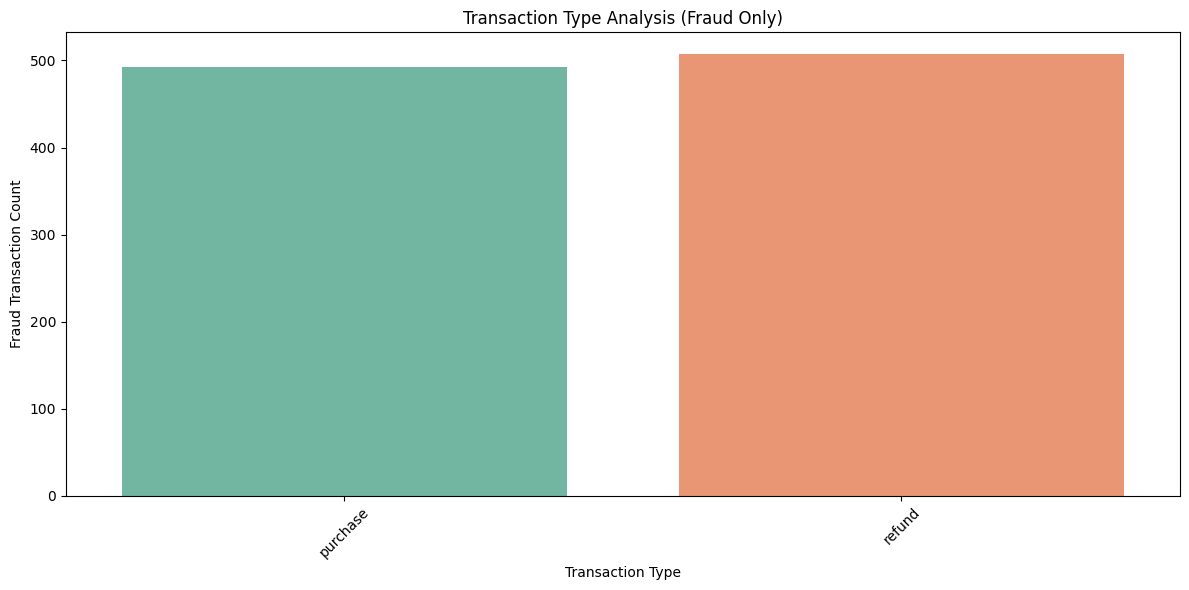

In [19]:
plt.figure(figsize=(12, 6))

fraud_data = data[data['IsFraud'] == 1]

sns.countplot(x='TransactionTypeLabel', data=fraud_data, palette='Set2')
plt.title('Transaction Type Analysis (Fraud Only)')
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Transaction Count')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()
plt.show()

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   TransactionID         100000 non-null  int64  
 1   Amount                100000 non-null  float64
 2   MerchantID            100000 non-null  int64  
 3   TransactionType       100000 non-null  int32  
 4   Location              100000 non-null  int32  
 5   IsFraud               100000 non-null  int64  
 6   TransactionHour       100000 non-null  int32  
 7   TransactionDay        100000 non-null  int32  
 8   TransactionMonth      100000 non-null  int32  
 9   TransactionTypeLabel  100000 non-null  object 
 10  LocationLabel         100000 non-null  object 
dtypes: float64(1), int32(5), int64(3), object(2)
memory usage: 5.7+ MB


In [21]:
data_model = data.drop(columns=['TransactionID', 'TransactionTypeLabel', 'LocationLabel', 'MerchantID'])

X = data_model.drop(columns=['IsFraud'])
y = data_model['IsFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    models[model_name] = model  

/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:04:13] WARNING: /root/repo/packages/xgboost/build/xgboost-2.1.2/cpp_src/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Logistic Regression Accuracy: 0.99

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     29700
           1       0.00      0.00      0.00       300

    accuracy                           0.99     30000
   macro avg       0.49      0.50      0.50     30000
weighted avg       0.98      0.99      0.99     30000



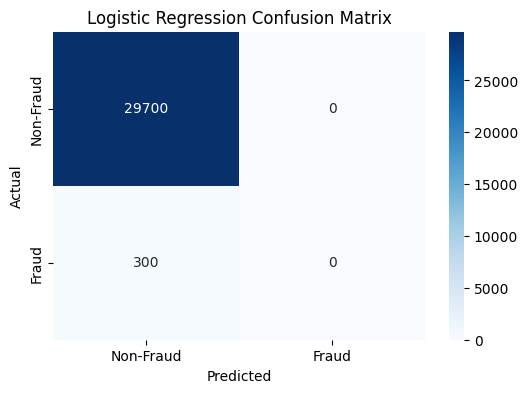


Decision Tree Accuracy: 0.9764

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     29700
           1       0.00      0.01      0.01       300

    accuracy                           0.98     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.98      0.98      0.98     30000



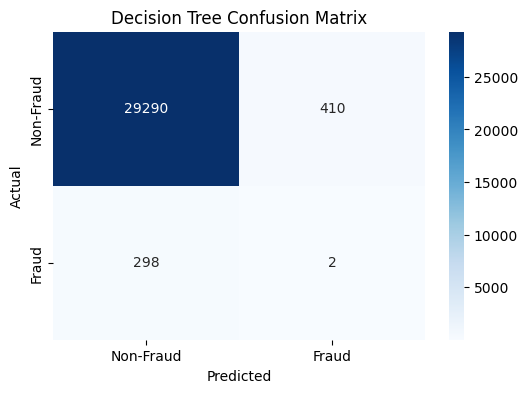

/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest Accuracy: 0.99

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     29700
           1       0.00      0.00      0.00       300

    accuracy                           0.99     30000
   macro avg       0.49      0.50      0.50     30000
weighted avg       0.98      0.99      0.99     30000



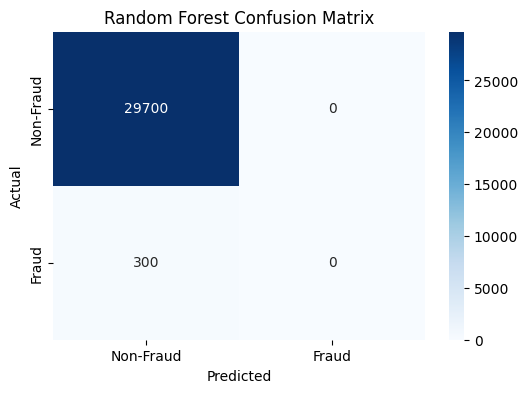


XGBoost Accuracy: 0.9899333333333333

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     29700
           1       0.00      0.00      0.00       300

    accuracy                           0.99     30000
   macro avg       0.49      0.50      0.50     30000
weighted avg       0.98      0.99      0.98     30000



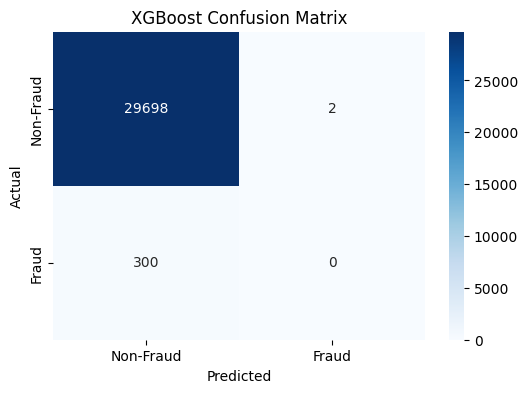

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluation dictionary to store results
evaluation_results = {}

# Evaluasi setiap model
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    
    # Hitung accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Classification report
    clf_report = classification_report(y_test, y_pred)
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Store results in dictionary
    evaluation_results[model_name] = {
        "accuracy": accuracy,
        "classification_report": clf_report,
        "confusion_matrix": conf_matrix
    }
     # Print evaluation for each model
    print(f"\n{model_name} Accuracy: {accuracy}")
    print(f"\n{model_name} Classification Report:\n", clf_report)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   TransactionID         100000 non-null  int64  
 1   Amount                100000 non-null  float64
 2   MerchantID            100000 non-null  int64  
 3   TransactionType       100000 non-null  int32  
 4   Location              100000 non-null  int32  
 5   IsFraud               100000 non-null  int64  
 6   TransactionHour       100000 non-null  int32  
 7   TransactionDay        100000 non-null  int32  
 8   TransactionMonth      100000 non-null  int32  
 9   TransactionTypeLabel  100000 non-null  object 
 10  LocationLabel         100000 non-null  object 
dtypes: float64(1), int32(5), int64(3), object(2)
memory usage: 5.7+ MB


In [26]:
data = data.drop(['TransactionID', 'TransactionTypeLabel', 'LocationLabel'], axis=1)

In [27]:
X = data.drop('IsFraud', axis=1)
y = data['IsFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [29]:
print("Before SMOTE:")
print(f"Train Data - Positive class (Fraud): {y_train.sum()} | Negative class (Non-Fraud): {(y_train == 0).sum()}")
print(f"Test Data - Positive class (Fraud): {y_test.sum()} | Negative class (Non-Fraud): {(y_test == 0).sum()}")

Before SMOTE:
Train Data - Positive class (Fraud): 787 | Negative class (Non-Fraud): 79213
Test Data - Positive class (Fraud): 213 | Negative class (Non-Fraud): 19787


In [30]:
print("\nAfter SMOTE (Training Data):")
print(f"Train Data - Positive class (Fraud): {y_train_res.sum()} | Negative class (Non-Fraud): {(y_train_res == 0).sum()}")
print(f"Train Data Shape: {X_train_res.shape}")

print("\nTest Data (No Change):")
print(f"Test Data - Positive class (Fraud): {y_test.sum()} | Negative class (Non-Fraud): {(y_test == 0).sum()}")
print(f"Test Data Shape: {X_test.shape}")


After SMOTE (Training Data):
Train Data - Positive class (Fraud): 79213 | Negative class (Non-Fraud): 79213
Train Data Shape: (158426, 7)

Test Data (No Change):
Test Data - Positive class (Fraud): 213 | Negative class (Non-Fraud): 19787
Test Data Shape: (20000, 7)


In [31]:
for model_name, model in models.items():
    model.fit(X_train_res, y_train_res)
    models[model_name] = model 

/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:04:36] WARNING: /root/repo/packages/xgboost/build/xgboost-2.1.2/cpp_src/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Logistic Regression Accuracy: 0.52065

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.52      0.68     19787
           1       0.01      0.46      0.02       213

    accuracy                           0.52     20000
   macro avg       0.50      0.49      0.35     20000
weighted avg       0.98      0.52      0.68     20000



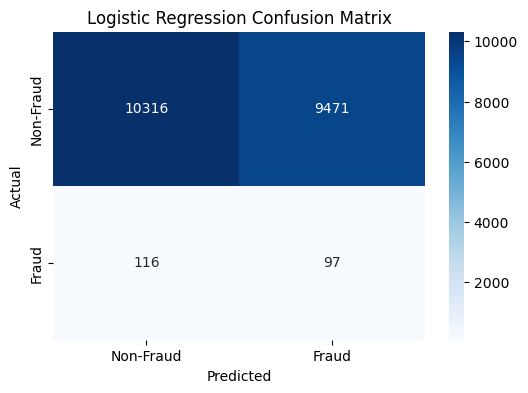


Decision Tree Accuracy: 0.92025

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96     19787
           1       0.01      0.06      0.02       213

    accuracy                           0.92     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.98      0.92      0.95     20000



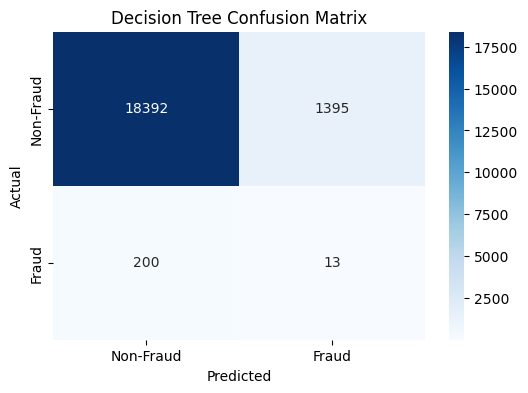


Random Forest Accuracy: 0.95345

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98     19787
           1       0.01      0.04      0.02       213

    accuracy                           0.95     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.98      0.95      0.97     20000



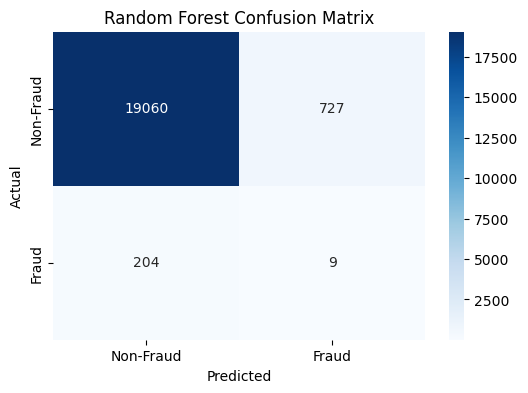


XGBoost Accuracy: 0.83595

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.84      0.91     19787
           1       0.01      0.15      0.02       213

    accuracy                           0.84     20000
   macro avg       0.50      0.50      0.46     20000
weighted avg       0.98      0.84      0.90     20000



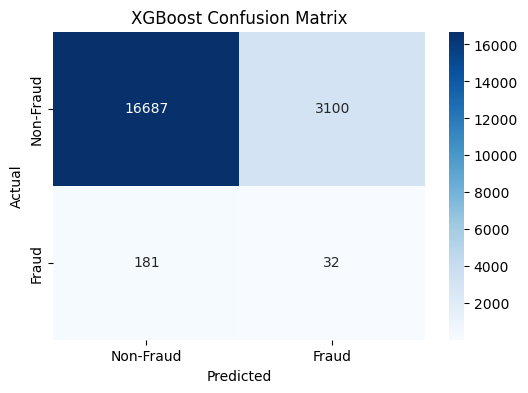

In [32]:
# Evaluation dictionary to store results
evaluation_results = {}

# Evaluasi setiap model
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    
    # Hitung accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Classification report
    clf_report = classification_report(y_test, y_pred)
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Store results in dictionary
    evaluation_results[model_name] = {
        "accuracy": accuracy,
        "classification_report": clf_report,
        "confusion_matrix": conf_matrix
    }
    # Print evaluation for each model
    print(f"\n{model_name} Accuracy: {accuracy}")
    print(f"\n{model_name} Classification Report:\n", clf_report)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_res, y_train_res)

print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   3.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   3.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   3.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   3.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   3.8s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   5.5s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time= 

Best Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
Best Score: 0.9685595071673939
Accuracy: 0.94875
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     19787
           1       0.01      0.04      0.02       213

    accuracy                           0.95     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.98      0.95      0.96     20000



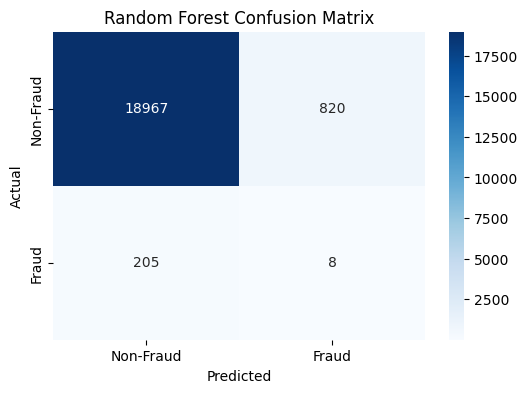

In [34]:
# Get the best model from the search
best_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation results
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{clf_report}")

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming data is preprocessed and labeled
X = data.drop('IsFraud', axis=1)
y = data['IsFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


In [36]:
from sklearn.ensemble import IsolationForest

# Assuming X contains transaction features (without 'IsFraud')
iso_forest = IsolationForest(contamination=0.01)  # Assume 1% fraud data
anomalies = iso_forest.fit_predict(X)

# Mark anomalies as fraud
data['Anomaly_Fraud'] = anomalies


In [41]:
print(data.columns)

Index(['Amount', 'MerchantID', 'TransactionType', 'Location', 'IsFraud',
       'TransactionHour', 'TransactionDay', 'TransactionMonth',
       'Anomaly_Fraud'],
      dtype='object')


In [43]:
def fraud_rule_based_detection(row):
    if row['Amount'] > 10000:  # High-value transaction
        return 1
    if row['TransactionHour'] < 5:  # Transactions between 12 AM and 5 AM
        return 1
    return 0

data['Rule_Fraud'] = data.apply(fraud_rule_based_detection, axis=1)


In [46]:
def fraud_rule_based_detection(transaction):
    if transaction['Amount'] > 10000:  # Threshold for high-value transactions
        return 1
    if transaction['TransactionHour'] < 5:  # Corrected column
        return 1
    return 0

# Assume preprocess function (you can define your actual preprocessing)
def preprocess(transaction):
    # Create a DataFrame with one row and correct column names
    features = pd.DataFrame([{
        'Amount': transaction['Amount'],
        'MerchantID': transaction['MerchantID'],
        'TransactionType': transaction['TransactionType'],
        'Location': transaction['Location'],
        'TransactionHour': transaction['TransactionHour'],
        'TransactionDay': transaction['TransactionDay'],
        'TransactionMonth': transaction['TransactionMonth']
    }])
    return features
   
# Real-time fraud detection combining rule-based + ML + Anomaly Detection
def real_time_fraud_detection(transaction):
    # Preprocess input
    transaction_processed = preprocess(transaction)
    
    # Apply each detection layer
    supervised_score = rf_model.predict(transaction_processed)[0]
    anomaly_score = iso_forest.predict(transaction_processed)[0]
    rule_score = fraud_rule_based_detection(transaction)
    
    # Aggregate the scores
    total_score = supervised_score + anomaly_score + rule_score
    
    # Return result
    if total_score > 1:
        return "Fraud"
    return "Non-Fraud"

# Example real-time transaction
transaction = {
    'Amount': 5000,
    'MerchantID': 12345,             
    'TransactionType': 1,          
    'Location': 10,                 
    'TransactionHour': 3,
    'TransactionDay': 15,
    'TransactionMonth': 4
}

# Running the detection
result = real_time_fraud_detection(transaction)
print(result)


Fraud


In [47]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Introduction to the JupyterLab and Jupyter Notebooks

This is a short introduction to two of the flagship tools created by [the Jupyter Community](https://jupyter.org).

> **⚠️Experimental!⚠️**: This is an experimental interface provided by the [JupyterLite project](https://jupyterlite.readthedocs.io/en/latest/). It embeds an entire JupyterLab interface, with many popular packages for scientific computing, in your browser. There may be minor differences in behavior between JupyterLite and the JupyterLab you install locally. You may also encounter some bugs or unexpected behavior. To report any issues, or to get involved with the JupyterLite project, see [the JupyterLite repository](https://github.com/jupyterlite/jupyterlite/issues?q=is%3Aissue+is%3Aopen+sort%3Aupdated-desc).

## JupyterLab 🧪

**JupyterLab** is a next-generation web-based user interface for Project Jupyter. It enables you to work with documents and activities such as Jupyter notebooks, text editors, terminals, and custom components in a flexible, integrated, and extensible manner. It is the interface that you're looking at right now.

**For an overview of the JupyterLab interface**, see the **JupyterLab Welcome Tour** on this page, by going to `Help -> Welcome Tour` and following the prompts.

> **See Also**: For a more in-depth tour of JupyterLab with a full environment that runs in the cloud, see [the JupyterLab introduction on Binder](https://mybinder.org/v2/gh/jupyterlab/jupyterlab-demo/HEAD?urlpath=lab/tree/demo).

## Jupyter Notebooks 📓

**Jupyter Notebooks** are a community standard for communicating and performing interactive computing. They are a document that blends computations, outputs, explanatory text, mathematics, images, and rich media representations of objects.

JupyterLab is one interface used to create and interact with Jupyter Notebooks.

**For an overview of Jupyter Notebooks**, see the **JupyterLab Welcome Tour** on this page, by going to `Help -> Notebook Tour` and following the prompts.

> **See Also**: For a more in-depth tour of Jupyter Notebooks and the Classic Jupyter Notebook interface, see [the Jupyter Notebook IPython tutorial on Binder](https://mybinder.org/v2/gh/ipython/ipython-in-depth/HEAD?urlpath=tree/binder/Index.ipynb).

## An example: visualizing data in the notebook ✨

Below is an example of a code cell. We'll visualize some simple data using two popular packages in Python. We'll use [NumPy](https://numpy.org/) to create some random data, and [Matplotlib](https://matplotlib.org) to visualize it.

Note how the code and the results of running the code are bundled together.

## Next steps 🏃

This is just a short introduction to JupyterLab and Jupyter Notebooks. See below for some more ways to interact with tools in the Jupyter ecosystem, and its community.

### Other notebooks in this demo

Here are some other notebooks in this demo. Each of the items below corresponds to a file or folder in the **file browser to the left**.

- [**`Lorenz.ipynb`**](Lorenz.ipynb) uses Python to demonstrate interactive visualizations and computations around the [Lorenz system](https://en.wikipedia.org/wiki/Lorenz_system). It shows off basic Python functionality, including more visualizations, data structures, and scientific computing libraries.
- [**`sqlite.ipynb`**](sqlite.ipynb) demonstrates how an in-browser sqlite kernel to run your own SQL commands from the notebook. It uses the [jupyterlite/xeus-sqlite-kernel](https://github.com/jupyterlite/xeus-sqlite-kernel).

### Other sources of information in Jupyter

- **More on using JupyterLab**: See [the JupyterLab documentation](https://jupyterlab.readthedocs.io/en/stable/) for more thorough information about how to install and use JupyterLab.
- **More interactive demos**: See [try.jupyter.org](https://try.jupyter.org) for more interactive demos with the Jupyter ecosystem.
- **Learn more about Jupyter**: See [the Jupyter community documentation](https://docs.jupyter.org) to learn more about the project, its community and tools, and how to get involved.
- **Join our discussions**: The [Jupyter Community Forum](https://discourse.jupyter.org) is a place where many in the Jupyter community ask questions, help one another, and discuss issues around interactive computing and our ecosystem.